In [55]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.graph_objs import *
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=True, theme='pearl')
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
%matplotlib inline

In [56]:
df = pd.read_excel('weights_heights.xlsx')
df_height = df['Height']
df_weight = df['Weight']

In [57]:
#Гистограма по росту
df_height.iplot(kind='histogram',title='Height histogram', xTitle='Height (inches)',  yTitle='Probability', barmode='stack', bins=100, histnorm='probability', filename='cufflinks/histogram-binning')

In [58]:
#Гистограма по весу
df_weight.iplot(kind='histogram', color='Red', title='Weight histogram', xTitle='Weight (pounds)',  yTitle='Probability', barmode='stack', bins=100, histnorm='probability', filename='cufflinks/histogram-binning')

In [59]:
df['BMI'] = (df['Weight']/(df['Weight']*df['Height'])*703).round(5)


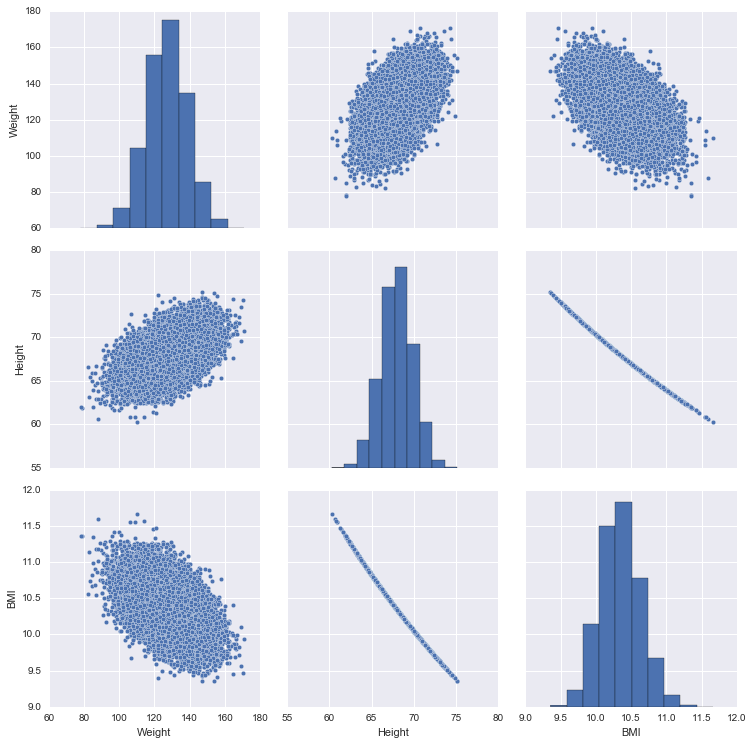

In [60]:
sns.set()
sns.pairplot(df[['Weight', 'Height', 'BMI']], size = 3.5)
plt.show();

признак weight_category 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте boxplot, демонстрирующий зависимость роста от весовой категории. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [61]:
# Функция весовой категории
def wcat(weight):
    if weight<120:
        return 1
    elif weight>=150:
        return 2
    else:
        return 3
    

In [62]:
#Добавим в наш df весовую категорию
df['weight_category'] = df_weight.apply(wcat)


In [63]:
#Построим boxplot 
trace0 = Box(
    y=df['Height'],
    x=df['weight_category'],
    name='noClassGc',
    marker=Marker(
        color='green'
    )
)

data = Data([trace0])
layout = Layout( title='Boxplot Height/weight category',
    yaxis=YAxis(
        title='Height (inches)',
        zeroline=False
    ),
    xaxis = XAxis(
    title = 'weight category'
    ),
    boxmode='group'
)

fig = Figure(data=data, layout=layout)
iplot(fig, filename='box-grouped')

In [64]:
# df.iplot(kind='scatter', mode='markers', x='Height', y='Weight') # тормозит

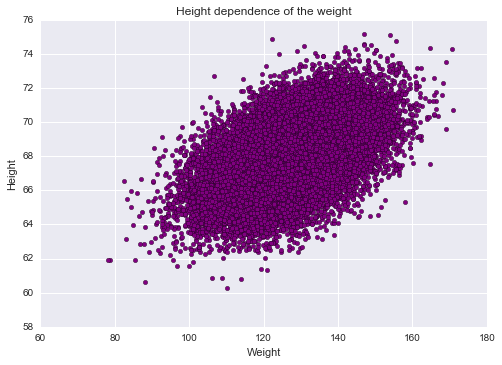

In [65]:
#scatter plot Height/Weight
var = 'Weight'
data = pd.concat([df['Height'], df[var]], axis=1)
data.plot.scatter(x=var, y='Height', title = 'Height dependence of the weight', color='purple')

In [66]:
def func_y(w0, w1, x):
    return w0 + w1*x

def func_error(w0, w1):
    return sum(map(lambda x, y: (y - func_y(w0, w1, x)) ** 2, df.Weight, df.Height))

In [67]:
def plot_model(w0_w1_values):
    plot_scatter = df.plot(x ='Weight',y = 'Height', kind = 'scatter', color='purple',  title='Height dependence of the weight')
    plot_scatter.set(xlabel = 'Weight', ylabel = 'Height')
    plt.xlim(50, 200)
    plt.ylim(50, 80)
    
    x_range = np.linspace(50, 200, 100)
    for w0, w1 in w0_w1_values:
        y = map(lambda p: func_y(w0, w1, p), x_range)
      

        
        plt.plot(x_range, y, lw = 2)

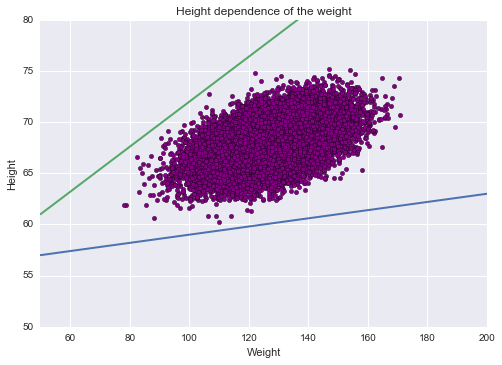

In [68]:
plot_model([(55, 0.04), (50, 0.22)])   

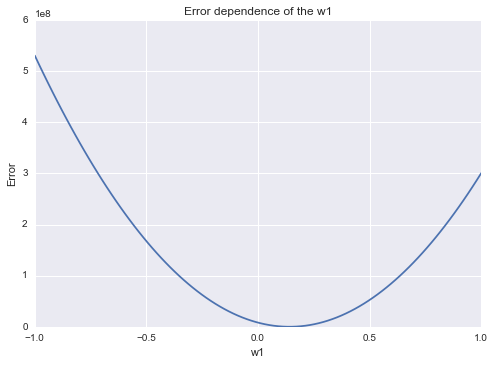

In [69]:
w0 = 50
w1 = np.linspace(-1, 1, 100)
error = map(lambda p: func_error(w0, p), w1)

# Слой с описанием
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Error dependence of the w1')
ax.set_xlabel('w1')
ax.set_ylabel('Error')
# Слой с нашими данными
plt.plot(w1, error)
plt.show()

w1_opt = 0.1411


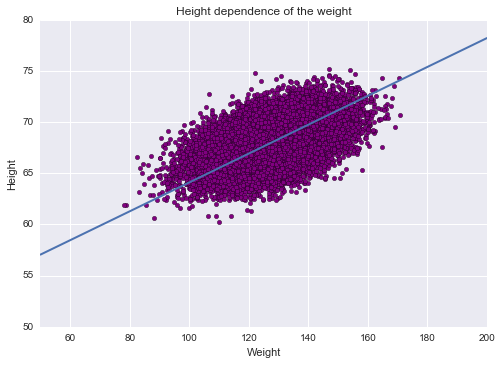

In [70]:
from scipy import optimize
w0 = 50
w1_opt = optimize.minimize_scalar(lambda x: func_error(w0, x), bounds = [-5, 5]).x
print 'w1_opt = %.4f' % w1_opt

plot_model([(w0, w1_opt)])

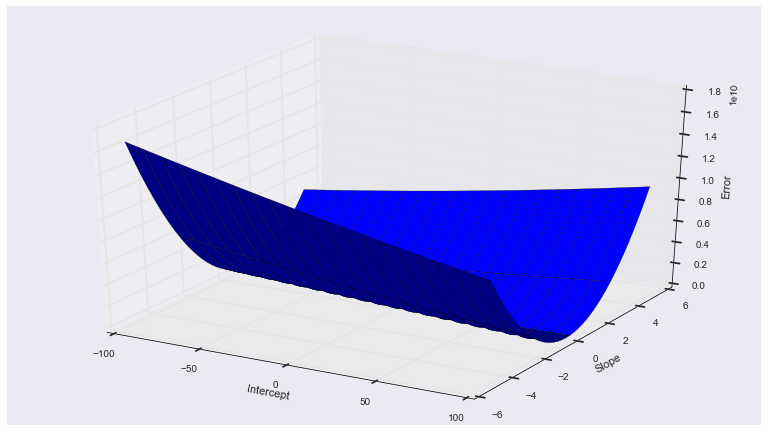

In [83]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(13.5, 7.5)
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям x и y. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.arange(-100, 101, 1)
W1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(W0, W1)
ERR = func_error(W0, W1)

# # Наконец, используем метод *plot_surface* объекта 
# # типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, ERR)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

plt.show()

# data = go.Data([
#     go.Mesh3d(
#         x = W1,
#         y = W1,
#         z = W0,
#         colorbar = go.ColorBar(
#             title='z'
#         ),
#         colorscale = [['0', 'rgb(255, 0, 0)'], ['0.5', 'rgb(0, 255, 0)'], ['1', 'rgb(0, 0, 255)']],
#         intensity = [0, 0.33, 0.66, 1],
#         i = [0, 0, 0, 1],
#         j = [1, 2, 3, 2],
#         k = [2, 3, 1, 3],
#         name = 'y',
#         showscale = True
#     )
# ])
# layout = go.Layout(
#     xaxis=go.XAxis(
#         title='x'
#     ),
#     yaxis=go.YAxis(
#         title='y'
#     )
# )
# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='3d-mesh-tetrahedron-python')



w0_opt = 57.5718, w1_opt = 0.0820


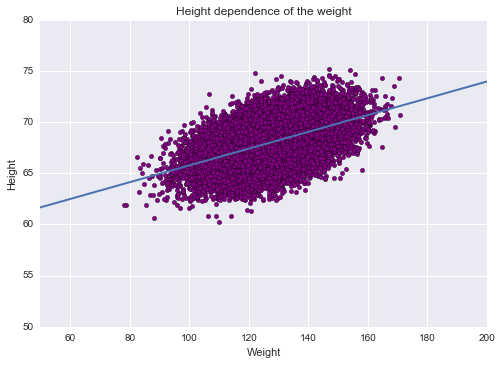

In [84]:
def func_error_opt(w):
    return func_error(w[0], w[1])

# Оптимизация функции
result = optimize.minimize(func_error_opt, (0,0), bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B')

#Присвоим w0_opt, w1_opt значения из массива result.x
w0_opt, w1_opt = result.x

optimize.minimize(func_error_opt, (0,0), bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B')
print 'w0_opt = %.4f, w1_opt = %.4f' % (w0_opt, w1_opt)


plot_model([(w0_opt, w1_opt)])  